In [211]:
import numpy as np
import pandas as pd

import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier

from time import time

from sklearn.cross_validation import train_test_split
from sklearn.metrics import fbeta_score, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from IPython.display import display

%matplotlib inline

1. Exploring the Data

1.1 length, variable, type and null check

1.2 dependent variable check (ratio, distribution..)

1.3 explainable variable check (trend analysis)  
1.3.1 describe() - mean, median..  
1.3.2 Sample Analysis  
1.3.3. visualization (correlation, skewness)  
1.3.4. skewed -> feature engineering(scaling, transformation ; log)  
1.3.5. re-visualization (correlation, skewness)  

1.4 explainable variable check (Outlier check) -> 제거

1.5 상관계수 및 그래프

1.3 trend analysis
1.4 correlation



# Exploring the Data

In [308]:
path = 'E:\\unist\\skt\\'
data = pd.read_csv(path+'loan.csv')
print(data.columns,'\n', len(data))
data.head()

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object') 
 614


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,Null,NaN,360,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141,360,1.0,Urban,Y


In [310]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [311]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [312]:
data = pd.read_csv(path+'bike.csv')
print(data.columns,'\n', len(data))
data.head()

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object') 
 17379


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [320]:
data.groupby('holiday')['casual'].describe()

,count,mean,std,min,25%,50%,75%,max
holiday,,,,,,,,
0,16879.0,35.408377,48.963745,0.0,4.0,17.0,48.00,367.0
1,500.0,44.718000,59.041360,0.0,4.0,17.0,63.25,272.0


In [319]:
data.groupby('holiday')['registered'].describe()

,count,mean,std,min,25%,50%,75%,max
holiday,,,,,,,,
0,16879.0,155.020203,152.210779,0.0,35.00,117.0,221.00,886.0
1,500.0,112.152000,111.369094,0.0,22.75,70.5,181.25,601.0


In [ ]:
data[]

In [307]:
data['cnt'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

#### Type and Null Check

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [41]:
data.isnull().sum()/len(data)

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [79]:
data.drop('customerID', axis=1, inplace=True)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
print('null rows 개수 : ', len(data[data['TotalCharges'].isnull()]))
data = data[data['TotalCharges'].notnull()]
print('null rows 제거 후 : ',len(data))

null rows 개수 :  0
null rows 제거 후 :  7032


##  
#### 종속변수 탐색

No     5163
Yes    1869
Name: Churn, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


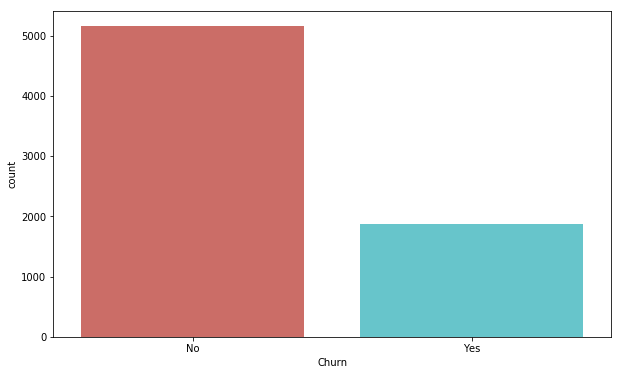

In [52]:
print(data['Churn'].value_counts())
plt.figure(figsize=(10,6))
sns.countplot(x='Churn', data=data, palette='hls')

In [64]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [63]:
data.groupby('Churn').describe()

MonthlyCharges                                                    \
               count       mean        std    min    25%     50%   75%   
Churn                                                                    
No            5174.0  61.265124  31.092648  18.25  25.10  64.425  88.4   
Yes           1869.0  74.441332  24.666053  18.85  56.15  79.650  94.2   

              SeniorCitizen            ...             tenure             \
          max         count      mean  ...   75%  max   count       mean   
Churn                                  ...                                 
No     118.75        5174.0  0.128721  ...   0.0  1.0  5174.0  37.569965   
Yes    118.35        1869.0  0.254682  ...   1.0  1.0  1869.0  17.979133   

                                               
             std  min   25%   50%   75%   max  
Churn                                          
No     24.113777  0.0  15.0  38.0  61.0  72.0  
Yes    19.531123  1.0   2.0  10.0  29.0  72.0  

[2 rows x 24 columns]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


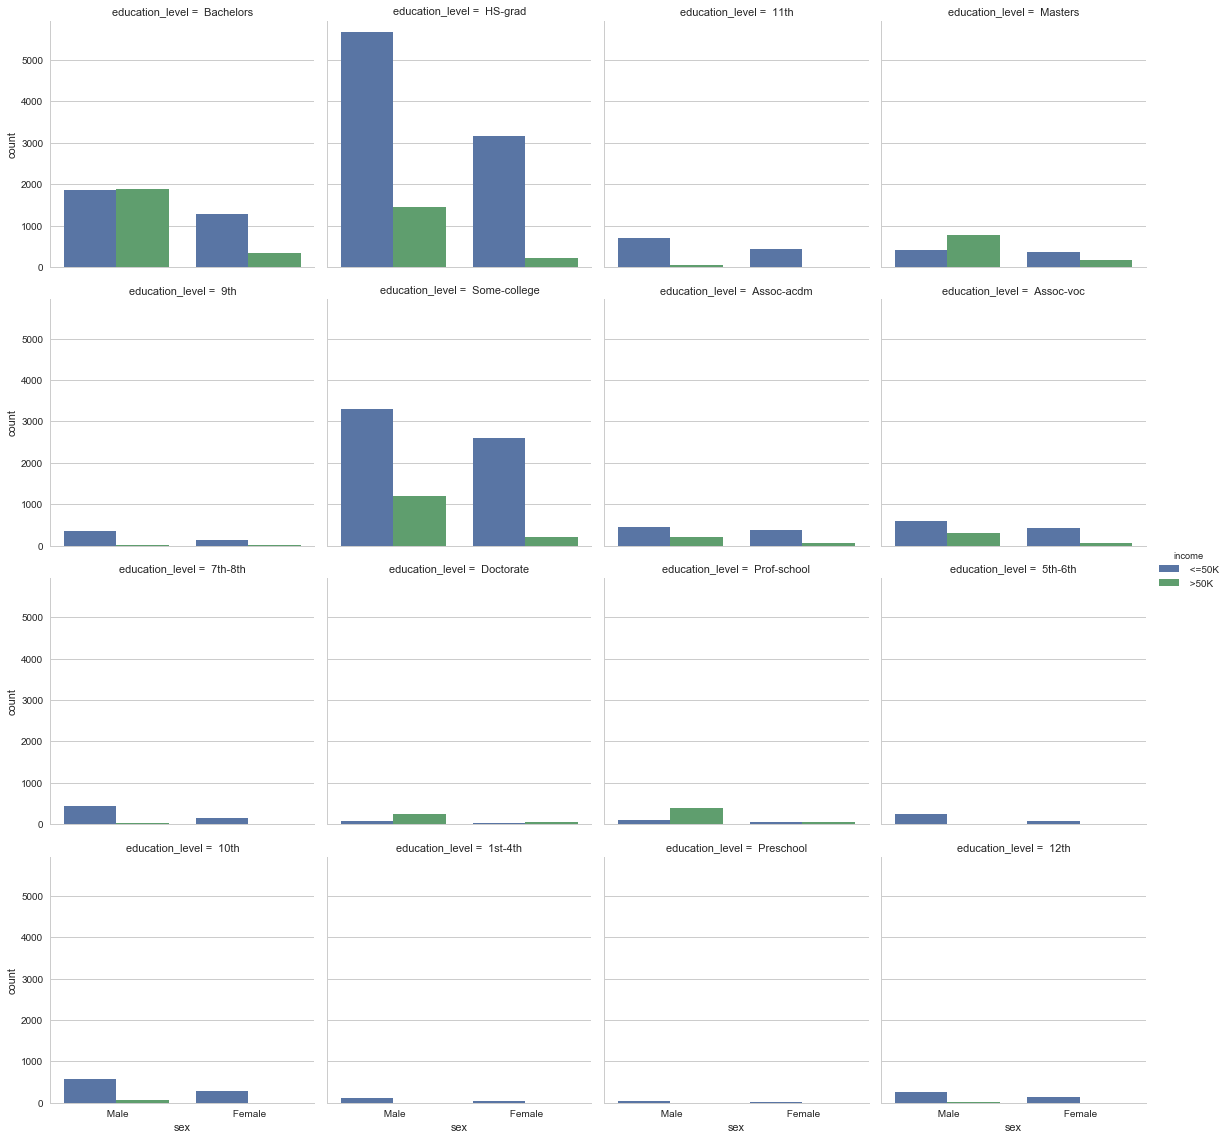

In [5]:
sns.set(style="whitegrid", color_codes=True)
sns.factorplot("gender", col='education_level', data=data, hue='churn', kind="count", col_wrap=4)

In [76]:
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = []

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1) * 1.5
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    out = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(out)
    outliers = outliers + list(out.index.values)
    

#Creating list of more outliers which are the same for multiple features.
outliers = list(set([x for x in outliers if outliers.count(x) > 1]))    

print("Outliers: {}".format(outliers))

# Remove the outliers, if any were specified 
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
print("The good dataset now has {} observations after removing outliers.".format(len(good_data)))

Data points considered outliers for the feature 'tenure':


,tenure,TotalCharges


Data points considered outliers for the feature 'TotalCharges':


,tenure,TotalCharges


Outliers: []
The good dataset now has 7032 observations after removing outliers.


In [83]:
data.dtypes

age                 int64
workclass          object
education_level    object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex                object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A2B7EB44E0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002A2B5ED1F98>]], dtype=object)

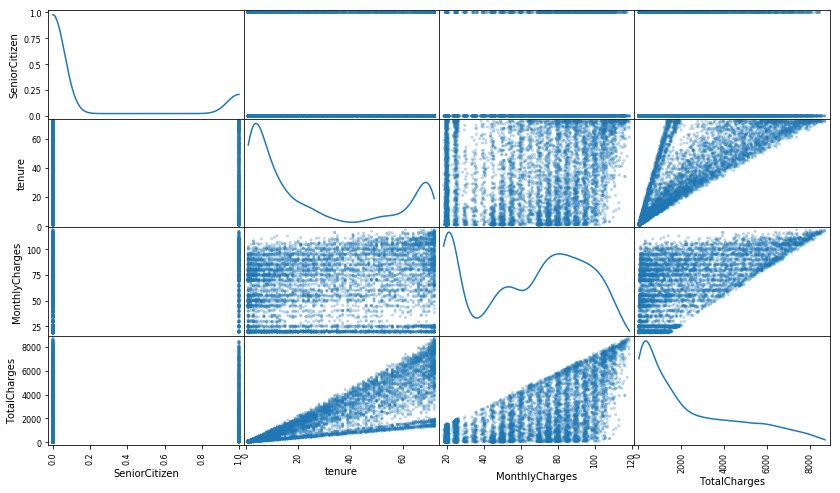

In [272]:
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')

In [75]:
log_data = data[['tenure', 'TotalCharges']].copy()

In [73]:
log_data['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

#### dummies  for categorical variable

In [90]:
con_var = data.columns[data.dtypes != 'object']
print(con_var)
cat_var = data.columns[data.dtypes == 'object']
print(cat_var)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')
Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


In [98]:
con = data[con_var]
cat = pd.get_dummies(data[cat_var], prefix=cat_var, drop_first=True)
D = pd.concat([con, cat], axis=1)
D.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


## Modeling

In [113]:
X = D.drop('Churn_Yes', axis=1)
y = D['Churn_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 5625 samples.
Testing set has 1407 samples.


In [274]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier(random_state = 100)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 2, verbose=2, random_state=1)
rf_random.fit(X_train, y_train)

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
learning_rate = [0.01, 0.05, 0.1]
max_depth = [3, 4, 5]
subsample = [0.7 0.8, 0.9]
colsample_bytree = [0.5, 0.8]
gamma = [0, 1, 5]
random_grid = {'n_estimators': n_estimators,
               'learning_rate' : learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'colsample_bytree': colsample_bytree,
               'random_grid': random_grid}

xgb = xgb.XGBClassifier(random_state = 100)
xgb_random = RandomizedSearchCV(estimator = xgb, param_distributions = random_grid, n_iter = 10, cv = 2, verbose=2, random_state=1)
xgb_random.fit(X_train, y_train)

In [295]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 500}

In [ ]:
clf_A.

In [293]:
fbeta_score(y_test, rf_random.best_estimator_.predict(X_test), 0.5)

0.62291805463024652

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=20, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=20, bootstrap=True, total=   1.5s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=20, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=20, bootstrap=True, total=   1.4s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=110, bootstrap=False 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=110, bootstrap=False, total=   0.2s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=110, bootstrap=False 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=110, bootstrap=False, total=   0.2s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=60, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=60, bootstrap=True, total=   1.7s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=60, bootstrap=True 
[CV]  n_estimators=600,

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   35.2s finished


RandomizedSearchCV(cv=2, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=1, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [273]:
def train_predict(learner, X_train, y_train, X_test, y_test): 
    
    results = {}
    learner = learner.fit(X_train,y_train)

    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    
    results['acc_train'] = accuracy_score(y_train,predictions_train)
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    results['f_train'] = fbeta_score(y_train,predictions_train,0.5)
    results['f_test'] = fbeta_score(y_test,predictions_test,0.5)

    return results

In [296]:
clf_A = rf_random.best_estimator_
clf_B = xgb.XGBClassifier(random_state = 11)
clf_C = lgb.LGBMClassifier(random_state = 11)

In [299]:
results = {}
for clf in [clf_A]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    results[clf_name] = train_predict(clf, X_train, y_train, X_test, y_test)

In [298]:
results

{'LGBMClassifier': {'acc_test': 0.79744136460554371,
  'acc_train': 0.82257777777777774,
  'f_test': 0.61068702290076349,
  'f_train': 0.67788141239173882},
 'RandomForestClassifier': {'acc_test': 0.80241648898365314,
  'acc_train': 0.84568888888888893,
  'f_test': 0.62291805463024652,
  'f_train': 0.72803078896728668},
 'XGBClassifier': {'acc_test': 0.80312722103766876,
  'acc_train': 0.82275555555555557,
  'f_test': 0.62458908612754771,
  'f_train': 0.67615089514066495}}

In [ ]:
# 클래스가 1일 확률
clf_A.predict_proba()
clf_B.predict_proba()
clf_C.predict_proba()

In [269]:
# 클래스가 1일 확률
X_train['probability'] = clf_A.predict_proba(X_train)[:, 1]

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2964,0,24,58.35,1346.90,1,1,0,1,0,1,...,0,0,0,0,1,0,1,0,1,0
5113,0,71,113.65,8166.80,0,1,1,1,0,1,...,0,1,0,1,0,1,0,1,0,0
5363,0,70,25.35,1715.15,1,1,1,1,0,1,...,1,0,1,0,0,1,0,0,0,1
5074,0,49,19.45,921.30,0,0,1,1,0,0,...,1,0,1,0,1,0,0,1,0,0
156,0,22,84.15,1821.95,0,0,0,1,0,1,...,0,1,0,0,0,0,1,0,0,0
2390,0,8,19.80,160.05,0,1,1,1,0,0,...,1,0,1,0,1,0,0,0,1,0
5878,0,3,21.20,52.05,1,0,0,1,0,0,...,1,0,1,0,1,0,0,0,0,1
942,0,24,79.85,2001.00,1,0,0,1,0,0,...,0,0,0,1,0,0,1,1,0,0
2809,1,37,36.65,1315.00,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
6498,0,1,82.30,82.30,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [182]:
print(classification_report(y_test, clf_A.predict(X_test)))


             precision    recall  f1-score   support

          0       0.82      0.90      0.86      1038
          1       0.61      0.43      0.50       369

avg / total       0.76      0.78      0.76      1407



In [242]:
def evaluate(results):
    """
    Visualization code to display results of various learners.
    
    inputs:
      - learners: a list of supervised learners
      - stats: a list of dictionaries of the statistic results from 'train_predict()'
      - accuracy: The score for the naive predictor
      - f1: The score for the naive predictor
    """
  
    # Create figure
    fig, ax = plt.subplots(2, 2, figsize = (10,7))

    # Constants
    bar_width = 0.3
    colors = ['#A00000','#00A0A0','#00A000']
    
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['acc_train', 'f_train', 'acc_test', 'f_test']):
            # Creative plot code
            ax[int(j/2), j%2].bar(k*bar_width, results[learner][metric], width = bar_width, color = colors[k])
            
    # Add unique y-labels
    ax[0, 0].set_ylabel("Accuracy Score")
    ax[0, 1].set_ylabel("F-score")
    ax[1, 0].set_ylabel("Accuracy Score")
    ax[1, 1].set_ylabel("F-score")
    
    # Add titles
    ax[0, 0].set_title("Accuracy Score on Training Subset")
    ax[0, 1].set_title("F-score on Training Subset")
    ax[1, 0].set_title("Accuracy Score on Testing Set")
    ax[1, 1].set_title("F-score on Testing Set")
    

    
    # Set y-limits for score panels
    ax[0, 0].set_ylim((0, 1))
    ax[0, 1].set_ylim((0, 1))
    ax[1, 0].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    plt.legend(handles = patches, bbox_to_anchor = (-.15, 2.53), \
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')
    
    # Aesthetics
    plt.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, y = 1.10)
    plt.tight_layout()
    plt.show()

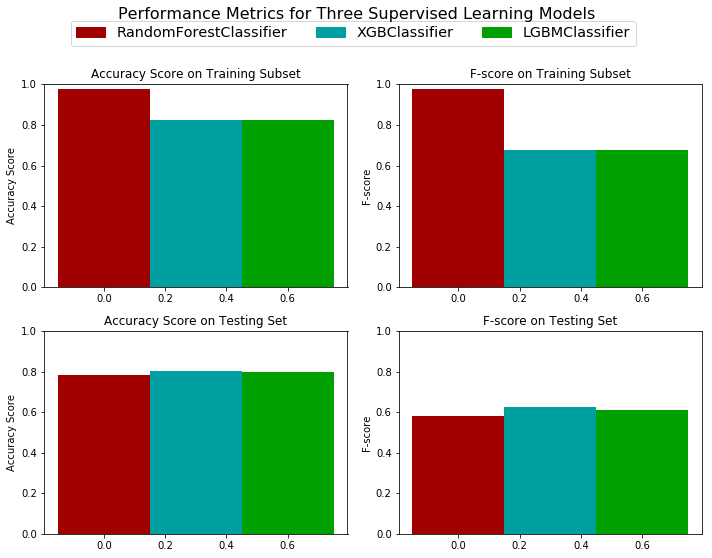

In [263]:
evaluate(results)

In [280]:
results

{'LGBMClassifier': {'acc_test': 0.79744136460554371,
  'acc_train': 0.82257777777777774,
  'f_test': 0.61068702290076349,
  'f_train': 0.67788141239173882},
 'RandomForestClassifier': {'acc_test': 0.78393745557924666,
  'acc_train': 0.97937777777777779,
  'f_test': 0.57862491490810064,
  'f_train': 0.97632311977715869},
 'XGBClassifier': {'acc_test': 0.80312722103766876,
  'acc_train': 0.82275555555555557,
  'f_test': 0.62458908612754771,
  'f_train': 0.67615089514066495}}

In [118]:
random_grid

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}

In [120]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 600}

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=0)
print(logit_res.summary())